<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
### Indian Startup Ecosystem Analysis

# Intro
## General

### Objective

The objective of this project is to explore and find insights from the data on funding to Startups in India from **2018 to 2021**, and advise a team on thier next step as the try to venture in the Indian startup ecosystem.

### Hypothesis
**Null Hypothesis** : Funding to startup is centralized around a few locations and sectors

**Alternate Hypothesis** : Funding to startup is spred across different locations and sectors

### Research Questions


Which Industry received the highest amount of funding?

Which industry received the lowest amount of funding?

Which location recorded the highest amount of funding received?

What is the average amount of funding received in top ten sectors?

How many companies received funding in each year?

Which company received the highest amount of funds?

Which company received the lowest amount of funds ?

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data handling
import pandas as pd
import numpy as np 
import datetime as dt

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os
#from forex_python.converter import CurrencyRates


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# For CSV, use pandas.read_csv
data_2018=pd.read_csv('../app/data/startup_funding2018.csv')
data_2019=pd.read_csv('../app/data/startup_funding2019.csv')
data_2020=pd.read_csv('../app/data/startup_funding2020.csv')
data_2021=pd.read_csv('../app/data/startup_funding2021.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Cleaning 2018 data

In [3]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [5]:
# maintianing first word before comma in the industry column
data_2018['Industry'] = data_2018['Industry'].apply(str)
data_2018['Industry'] = data_2018['Industry'].str.split(',').str[0]
data_2018['Industry'] = data_2018['Industry'].replace("'","",regex=True)

In [6]:
data_2018['Industry']

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
521                       B2B
522                   Tourism
523         Food and Beverage
524    Information Technology
525             Biotechnology
Name: Industry, Length: 526, dtype: object

In [7]:
# maintianing first word before comma in the location column
data_2018['Location'] = data_2018['Location'].apply(str)
data_2018['Location'] = data_2018['Location'].str.split(',').str[0]
data_2018['Location'] = data_2018['Location'].replace("'","",regex=True)

In [8]:
data_2018['Location']

0      Bangalore
1         Mumbai
2        Gurgaon
3          Noida
4      Hyderabad
         ...    
521    Bangalore
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: Location, Length: 526, dtype: object

In [9]:
data_2018['Amount']

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount, Length: 526, dtype: object

In [10]:
# Cleaning the Amounts column
## Removing the commas and dashes from the Amounts
data_2018['Amount'] = data_2018['Amount'].apply(str)
data_2018['Amount'].replace(",", "", inplace = True, regex=True)
data_2018['Amount'].replace("—", 0, inplace = True, regex=True)
data_2018['Amount'].replace("$", "", inplace = True, regex=True)

In [11]:
## Creating temporary columns to help with the conversion of INR to USD
data_2018['INR Amount'] = data_2018['Amount'].str.rsplit('₹', n = 2).str[1]
data_2018['INR Amount'] = data_2018['INR Amount'].apply(float).fillna(0)
data_2018['USD Amount'] = data_2018['INR Amount'] * 0.0146
data_2018['USD Amount'] = data_2018['USD Amount'].replace(0, np.nan)
data_2018['USD Amount'] = data_2018['USD Amount'].fillna(data_2018['Amount'])
data_2018['USD Amount'] = data_2018['USD Amount'].replace("$", "", regex=True)
data_2018["Amount"] = data_2018["USD Amount"]
data_2018["Amount"] = data_2018["Amount"].apply(lambda x: float(str(x).replace("$","")))
data_2018["Amount"] = data_2018["Amount"].replace(0, np.nan)

In [12]:
# Dropping the temporary columns
data_2018.drop(columns = ["INR Amount", "USD Amount"], inplace = True)

In [13]:
data_2018 = data_2018.rename(columns =  {'Company Name':'Company/Brand', 'Industry':'Sector', 'Location':'HeadQuarter','Round/Series':'Stage', 'About Company':'What it does','Amount':'Amount($)'} )

In [14]:
data_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,511000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [15]:
#inspecting stage column
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [16]:
data_2018['Stage']=data_2018['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.nan)

In [17]:
data_2018['Stage']=data_2018['Stage'].replace('Undisclosed',np.nan)

In [18]:
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', nan, 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round'],
      dtype=object)

In [19]:
data_2018[data_2018['Stage']=='Venture - Series Unknown']

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
94,Rays Power Infra,Energy,Venture - Series Unknown,29200000.0,Jaipur,Rays Power Infra is a leading integrated Solar...
106,Vivriti Capital,Financial Services,Venture - Series Unknown,28500000.0,Chennai,Vivriti Capital is an online platform for inst...
118,SEDEMAC Mechatronics,Automotive,Venture - Series Unknown,NaN,Mumbai,SEDEMAC Mechatronics is technology company tha...
119,MadGuy Labs,E-Learning,Venture - Series Unknown,150000.0,Hyderabad,MadGuy Labs is a Online Test-prep Platform.
131,Wakefit,Manufacturing,Venture - Series Unknown,9490000.0,Bangalore,Wakefitkart is a mattress manufacturing compan...
132,Hero Electric,Manufacturing,Venture - Series Unknown,23360000.0,New Delhi,"Hero Electric, a 100% subsidiary of the Hero G..."
138,Wow Venue,Events,Venture - Series Unknown,1500000.0,Mumbai,Wow Venue is an online platform.
143,MyNewCar.in,Automotive,Venture - Series Unknown,1000000.0,Gurgaon,MyNewCar.in offers new cars at best price with...
152,Shopkirana,E-Commerce,Venture - Series Unknown,2000000.0,Indore,Shopkirana connects brands and traditional ret...
153,Fric Bergen,—,Venture - Series Unknown,NaN,Alwar,Fric Bergen is a leader in the specialty food ...


In [20]:
data_2018['Stage']=data_2018['Stage'].replace('Venture - Series Unknown',np.nan)

In [21]:
##sector
data_2018['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [22]:
data_2018['Sector']= data_2018['Sector'].replace('—',np.nan)

In [23]:
#Headquarters
data_2018['HeadQuarter'].unique()


array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [24]:
data_2018['Funding Year']=2018
data_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


## Cleaning 2019 data

In [25]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


### Inspect individual columns

In [26]:
#founded
data_2019['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [27]:
#headquarters
data_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [28]:
#sector
data_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [29]:
data_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [30]:
#remove comas, dashes from the amounts in the data frame
data_2019["Amount($)"] = data_2019["Amount($)"].apply(str)
data_2019["Amount($)"].replace(",","", inplace = True, regex=True)
data_2019["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2019["Amount($)"] = data_2019["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
data_2019["Founded"].replace("nan", np.nan, inplace = True, regex=True)
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN


In [31]:
data_2019['Funding Year']=2019
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


## Cleaning 2020 data
* Inspect indiviual columns and fix errors in data set
* Drop **Unnamed: 9** column

In [32]:

data_2020['Unnamed: 9'].unique()

array([nan, 'Pre-Seed', 'Seed Round'], dtype=object)

In [33]:
data_2020.loc[data_2020['Unnamed: 9']=='Seed Round']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...","$1,700,000",Seed Round,Seed Round


In [34]:
data_2020.loc[data_2020['Unnamed: 9']=='Pre-Seed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
611,Walrus,2019,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,Undisclosed,Pre-Seed,Pre-Seed


In [35]:
data_2020=data_2020.drop('Unnamed: 9', axis=1)

In [36]:
#founded column
data_2020['Founded'].unique()

array(['2019', '2018', '2020', '2016', '2008', '2015', '2017', '2014',
       '1998', '2007', '2011', '1982', '2013', '2009', '2012', '1995',
       '2010', '2006', '1978', nan, '1999', '1994', '2005', '1973', '-',
       '2002', '2004', '2001'], dtype=object)

In [37]:
#replace '-' with NaN
data_2020["Founded"].replace("-", np.nan, inplace = True, regex=True)

In [38]:
#headquarters
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', nan,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
 

In [39]:
# maintain first words using slipt by comma
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].apply(str)
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.split(',').str[0]
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace("'","",regex=True)

In [40]:
#amount column
data_2020['Amount($)'].unique()

array(['$200,000', '$100,000', 'Undisclosed', '$400,000', '$340,000',
       '$600,000', '$45,000,000', '$1,000,000', '$2,000,000',
       '$1,200,000', '$660,000,000', '$120,000', '$7,500,000',
       '$5,000,000', '$500,000', '$3,000,000', '$10,000,000',
       '$145,000,000', '$100,000,000', nan, '$21,000,000', '$4,000,000',
       '$20,000,000', '$560,000', '$275,000', '$4,500,000', '$15,000,000',
       '$390,000,000', '$7,000,000', '$5,100,000', '$700,000,000',
       '$2,300,000', '$700,000', '$19,000,000', '$9,000,000',
       '$40,000,000', '$750,000', '$1,500,000', '$7,800,000',
       '$50,000,000', '$80,000,000', '$30,000,000', '$1,700,000',
       '$2,500,000', '$40,000', '$33,000,000', '$35,000,000', '$300,000',
       '$25,000,000', '$3,500,000', '$200,000,000', '$6,000,000',
       '$1,300,000', '$4,100,000', '$575,000', '$800,000', '$28,000,000',
       '$18,000,000', '$3,200,000', '$900,000', '$250,000', '$4,700,000',
       '$75,000,000', '$8,000,000', '$121,000,000'

In [41]:
# remove comma and dollar sign from amounts
data_2020["Amount($)"] = data_2020["Amount($)"].apply(str)
data_2020["Amount($)"].replace(",","", inplace = True, regex=True)
data_2020["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2020["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
data_2020["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
data_2020["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

data_2020["Amount($)"] = data_2020["Amount($)"].apply(lambda x:(str(x).replace("$","")))

In [42]:
#Replacing the amounts "887000 23000000" and 800000000 to 850000000 with their avaerage
data_2020["Amount($)"].replace("887000 23000000", "119435500.0", inplace = True, regex=True)
data_2020["Amount($)"].replace("800000000 to 850000000", "825000000.0", inplace = True, regex=True)

In [43]:
data_2020['Amount($)'].replace('9.600000','9600000', inplace= True,regex=True)
data_2020['Amount($)'].replace('42.23000','4223000',inplace =True, regex=True)

In [44]:
data_2020["Amount($)"].astype("float")

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount($), Length: 1055, dtype: float64

In [45]:
data_2020['Funding Year']=2020
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,NaN,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000,NaN,2020
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000,Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000,NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000,Series C,2020


## Cleaning 2021 data
* Inspect indiviual columns and fix errors in data set
* Move data to thier right columns

In [46]:
data_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [47]:
#headquarters
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technolo

In [48]:
#correcting data
data_2021['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)

In [49]:
data_2021[data_2021['HeadQuarter']=='Online Media\t#REF!']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


In [50]:
data_2021.loc[data_2021["HeadQuarter"] == 'Pharmaceuticals\t#REF!']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


In [51]:
#sector
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [52]:

data_2021.loc[data_2021["Sector"] == 'Hauz Khas']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [53]:
data_2021.loc[data_2021["Company/Brand"] == "MasterChow", ["HeadQuarter", "Sector"]] = ["Hauz Khas", "Food & Beverages"]
data_2021.loc[data_2021["Company/Brand"] == "MasterChow"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
241,MasterChow,2020.0,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020.0,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [54]:
data_2021.drop([255], axis = 0, inplace = True)

In [55]:
data_2021.loc[data_2021["Sector"] == 'Manchester, Greater Manchester']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1176,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [56]:
#'Manchester, Greater Manchester'
data_2021.loc[data_2021["Company/Brand"] == "Peak", ["HeadQuarter", "Sector"]] = ["Manchester", "Information Technology & Services"]
data_2021.loc[data_2021["Company/Brand"] == "Peak"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1176,Peak,2014.0,Manchester,Information Technology & Services,Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [57]:
data_2021.loc[data_2021["Sector"] == 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


In [58]:
data_2021.loc[data_2021["Company/Brand"] == "Sochcast", ["HeadQuarter", "Sector",'What it does','Founders','Investor']] = [np.nan, 'Online Media','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','CA Harvinderjit Singh Bhatia, Garima Surana','Vinners, Raj Nayak, Amritaanshu Agrawal']
data_2021.loc[data_2021["Company/Brand"] == "Sochcast"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,NaN,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana","Vinners, Raj Nayak, Amritaanshu Agrawal",NaN,NaN


In [59]:
data_2021.loc[data_2021["Sector"] == "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN


In [60]:
data_2021.loc[data_2021["Company/Brand"] == "MoEVing", ["Sector",'What it does','Founders','Investor','Amount($)','Stage']] = [
    np.nan,"MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.",
    'Vikash Mishra, Mragank Jain','Anshuman Maheshwary, Dr Srihari Raju Kalidindi','$5000000','Seed']
data_2021.loc[data_2021["Company/Brand"] == "MoEVing"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram,NaN,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed


In [61]:
data_2021.loc[data_2021["Sector"] == 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


In [62]:
data_2021.loc[data_2021["Company/Brand"] == "Fullife Healthcare", ['HeadQuarter',"Sector",'What it does','Founders','Investor','Amount($)','Stage']] = [
    np.nan,'Pharmaceuticals',
    'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.',
    'Varun Khanna',
    'Morgan Stanley Private Equity Asia','$22000000','Series C']
data_2021.loc[data_2021["Company/Brand"] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C
256,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C


In [63]:
data_2021.drop([242], axis = 0, inplace = True)

In [64]:
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [65]:
#amount
data_2021['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

In [66]:
data_2021.loc[data_2021["Amount($)"] == "ah! Ventures"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000


In [67]:
data_2021.loc[data_2021["Company/Brand"] == "Little Leap", ["Amount($)", "Stage", "Investor"]] = [
    "$300000", np.nan, "ah! Ventures"]
data_2021.loc[data_2021["Investor"] == "ah! Ventures"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
356,OwO,2020.0,Gurugram,E-commerce,"Shop packaged drinking water, beverages from y...",Hardev Sahu,ah! Ventures,"$200,000",NaN
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah! Ventures,$300000,NaN
840,Klassroom,2016.0,Mumbai,EdTech,Klassroom offers a one-of-a-kind LIVE interact...,Alka Javeri,ah! Ventures,"$200,000",Pre-series A
1133,Enercomp,2013.0,Ahmedabad,Information Technology & Services,Enercomp Solutions Pvt Ltd provide drone based...,SURESH SHAHDADPURI,ah! Ventures,$200000,NaN


In [68]:
data_2021.loc[data_2021["Amount($)"] == "Pre-series A"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN


In [69]:
data_2021.loc[data_2021["Company/Brand"] == "AdmitKard", ["Amount($)", "Stage", "Investor"]] = [
    "$1000000", "Pre-series A",np.nan]
data_2021.loc[data_2021["Company/Brand"] == "AdmitKard"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,$1000000,Pre-series A


In [70]:
data_2021.loc[data_2021["Amount($)"] == 'Series C']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [71]:
data_2021.loc[data_2021["Amount($)"] == "Seed"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,NaN


In [72]:
data_2021.loc[data_2021["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = ["$1000000", "Seed",np.nan]
data_2021.loc[data_2021["Company/Brand"] == "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,$1000000,Seed


In [73]:
data_2021.loc[data_2021["Amount($)"] == 'ITO Angel Network, LetsVenture']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000


In [74]:
data_2021.loc[data_2021["Company/Brand"] == "BHyve", ["Amount($)", "Stage"]] = ["$300000",np.nan]
data_2021.loc[data_2021["Company/Brand"] == "BHyve"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN


In [75]:
data_2021.loc[data_2021["Amount($)"] == 'JITO Angel Network, LetsVenture']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [76]:
data_2021.loc[data_2021["Company/Brand"] == "Saarthi Pedagogy", ["Amount($)", "Stage"]] = ["$1000000",np.nan]
data_2021.loc[data_2021["Company/Brand"] == "Saarthi Pedagogy"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN


In [77]:
data_2021.loc[data_2021["Amount($)"] == 'Upsparks']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [78]:
data_2021.loc[data_2021["Company/Brand"] == "FanPlay", ['HeadQuarter',"Amount($)", "Stage", "Investor"]] = [np.nan,"$1200000", np.nan, "Upsparks"]
data_2021.drop([98], axis = 0, inplace = True)
data_2021.loc[data_2021["Company/Brand"] == "FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,$1200000,NaN


In [84]:
#clean Amount column and relapce NaN in founded in the data frame
data_2021["Amount($)"] = data_2021["Amount($)"].apply(str)
data_2021["Amount($)"].replace(",", "", inplace = True, regex=True)
data_2021["Amount($)"].replace("", 0, inplace = True, regex=True)
data_2021["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"] = data_2021["Amount($)"].apply(lambda x: (str(x).replace("$","")))
data_2021["Founded"].replace("nan", np.nan, inplace = True, regex=True)

In [85]:
data_2021["Amount($)"].astype("float")

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount($), Length: 1206, dtype: float64

In [86]:
data_2021['Amount($)'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'nan', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4400

In [87]:
data_2021['What it does'].unique()

array(['Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.',
       'UpGrad is an online higher education platform.',
       'LEAD School offers technology based school transformation system that assures excellent learning for every child.',
       ..., 'International education loans for high potential students.',
       'Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.',
       'India’s first socially distributed full stack financial services platform for small town India'],
      dtype=object)

In [88]:
data_2021['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', '$6000000', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [89]:
data_2021[data_2021['Stage']=='$6000000']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,nan,$6000000


In [90]:
data_2021.loc[data_2021["Company/Brand"] == "MYRE Capital", ["Amount($)", "Stage"]] = ["6000000",np.nan]
data_2021.loc[data_2021["Company/Brand"] == "MYRE Capital"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000,NaN


In [91]:
data_2021['Founders'].unique()

array(['Pramod Ghadge, Shahid Memon',
       'Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala',
       'Smita Deorah, Sumeet Mehta', ..., 'Bala Sarda',
       'Arnav Kumar, Vaibhav Singh', 'Vishal Chopra, Himanshu Gupta'],
      dtype=object)

In [92]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1206 non-null   object 
 1   Founded        1205 non-null   float64
 2   HeadQuarter    1202 non-null   object 
 3   Sector         1205 non-null   object 
 4   What it does   1206 non-null   object 
 5   Founders       1202 non-null   object 
 6   Investor       1142 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          778 non-null    object 
dtypes: float64(1), object(8)
memory usage: 94.2+ KB


In [93]:
data_2021['Funding Year']=2021
data_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B,2021


## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [94]:
#combining data into one 
sets=[data_2018,data_2019,data_2020, data_2021]
startup_data = pd.concat(sets)

In [95]:
startup_data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN


In [96]:
startup_data["Amount($)"].astype("float")

0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              NaN
           ...    
1204     3000000.0
1205    20000000.0
1206    55000000.0
1207    26000000.0
1208     8000000.0
Name: Amount($), Length: 2876, dtype: float64

In [97]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2876 non-null   object
 1   Sector         2827 non-null   object
 2   Stage          1898 non-null   object
 3   Amount($)      2716 non-null   object
 4   HeadQuarter    2853 non-null   object
 5   What it does   2876 non-null   object
 6   Funding Year   2876 non-null   int64 
 7   Founded        2107 non-null   object
 8   Founders       2331 non-null   object
 9   Investor       2248 non-null   object
dtypes: int64(1), object(9)
memory usage: 247.2+ KB


In [98]:
startup_data.describe()

,Funding Year
count,2876.000000
mean,2020.022601
std,1.087083
min,2018.000000
25%,2020.000000
50%,2020.000000
75%,2021.000000
max,2021.000000


# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [99]:
startup_data.isnull().sum()

Company/Brand      0
Sector            49
Stage            978
Amount($)        160
HeadQuarter       23
What it does       0
Funding Year       0
Founded          769
Founders         545
Investor         628
dtype: int64

In [100]:
startup_data['Founded'].unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020',
       '2016', '2008', '2015', '2017', '2014', '1998', '2007', '2011',
       '1982', '2013', '2009', '2012', '1995', '2010', '2006', '1978',
       '1999', '1994', '2005', '1973', '2002', '2004', '2001', 2021.0,
       2020.0, 1993.0, 1999.0, 1989.0, 2009.0, 2002.0, 1994.0, 2006.0,
       2000.0, 2007.0, 1978.0, 2003.0, 1998.0, 1991.0, 1984.0, 2005.0,
       1963.0], dtype=object)

In [101]:
startup_data['Founded']=startup_data['Founded'].replace(np.nan,0)

In [102]:
startup_data['Founded']=startup_data['Founded'].astype(int)

In [103]:
startup_data['Founded']=startup_data['Founded'].replace(0,'N/A')

In [104]:
#updating the columns 
startup_data.update(startup_data[['HeadQuarter','Sector','What it does', 'Founders', 'Investor','Stage']].fillna('N/A'))

In [105]:
startup_data[startup_data['Amount($)'].isnull()]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,N/A,N/A,N/A
8,Freightwalla,Information Services,Seed,NaN,Mumbai,Freightwalla is an international forwarder tha...,2018,N/A,N/A,N/A
9,Microchip Payments,Mobile Payments,Seed,NaN,Bangalore,Microchip payments is a mobile-based payment a...,2018,N/A,N/A,N/A
10,BizCrum Infotech Pvt. Ltd.,B2B,Seed,NaN,Delhi,Building Transactionary B2B Marketplaces,2018,N/A,N/A,N/A
11,Emojifi,Internet,Seed,NaN,Bengaluru,"Emojifi is an app that provides live emoji, st...",2018,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...
45,Afinoz,Fintech,N/A,NaN,Noida,Online financial marketplace for customized ra...,2019,N/A,Rachna Suneja,Fintech innovation lab
54,Ninjacart,B2B Supply Chain,N/A,NaN,N/A,It connects producers of food directly to reta...,2019,2015,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart"
55,Binca Games,Games,N/A,NaN,Mumbai,It offers games that are available across Indi...,2019,2014,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar
65,Cubical Labs,IoT,Series B,NaN,N/A,Home automation solution provider,2019,2013,"Dhruv Ratra, Swati Vyas",Rockstud Capital


In [106]:
#startup_data['Amount($)']=startup_data['Amount($)'].replace('$6000000',6000000)

In [107]:
startup_data['Amount($)']=startup_data['Amount($)'].astype(float)

In [108]:
startup_data['Funding Year']=startup_data['Funding Year'].astype(str)

In [109]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2876 non-null   object 
 1   Sector         2876 non-null   object 
 2   Stage          2876 non-null   object 
 3   Amount($)      2328 non-null   float64
 4   HeadQuarter    2876 non-null   object 
 5   What it does   2876 non-null   object 
 6   Funding Year   2876 non-null   object 
 7   Founded        2876 non-null   object 
 8   Founders       2876 non-null   object 
 9   Investor       2876 non-null   object 
dtypes: float64(1), object(9)
memory usage: 247.2+ KB


In [110]:
startup_data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'N/A',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'nan', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur

In [111]:
startup_data[startup_data['HeadQuarter']=='nan']

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor
87,Habitat,EdTech,Seed,600000.0,nan,"Habitat, a social learning edtech platform for...",2020,2016,"Rohit Pande, Shikhar Sachan","Unitus Ventures, Whiteboard Capital"
92,Raskik,Fusion beverages,Pre-series A,1000000.0,nan,All new fusion-flavour fruit juices with the g...,2020,2019,"Vikas Chawla, Abhay Parnerkar, Satyajit Ram","Venture Catalysts, 9Unicorns"
95,Pravasirojgar,Job portal,N/A,33000000.0,nan,Initiative for blue-collar job workers,2020,2020,Sonu Sood,GoodWorker.
121,Kaagaz Scanner,Scanning app,N/A,575000.0,nan,Kaagaz Scanner is the Indian replacement to ba...,2020,2020,"Snehanshu Gandhi, Gaurav Shrishrimal",Pravega Ventures
487,Exprs,Nano Distribution Network,N/A,5660000.0,nan,"Nano Distribution Centres, enabling seamless c...",2020,2018,"Srinivas Madhavam, Srikanth Rajashekhar, Rahul...","Sweta Rau, Sandeep Kapoor"
...,...,...,...,...,...,...,...,...,...,...
1035,Byju,Edtech,N/A,200000000.0,nan,Provides online learning classes,2020,2011,Byju Raveendran,Tiger Global
1041,Shiksha,Edtech,N/A,181000.0,nan,It makes college selection easy for students l...,2020,2008,Kanav Sachdeva,Mumbai Angels Network
1045,XpressBees,Logistics,N/A,10000000.0,nan,Provides end to end supply chain solutions,2020,2015,"Supam Maheshwari, Amitava Saha",Alibaba
1047,Wealth Bucket,Fintech,N/A,3000000.0,nan,An online platform for mutual fund investments,2020,2018,"Himanshu Jain, Pulkit Jain","NorthStar, Vinod Khatumal"


In [112]:
startup_data['HeadQuarter']=startup_data['HeadQuarter'].replace('nan','N/A')

In [113]:
startup_data['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'N/A', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile

In [114]:
startup_data['Sector']=startup_data['Sector'].replace('Edtech','EdTech')

In [115]:
pd.set_option('display.float_format','{:.2f}'.format)

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

### Research Questions


Which Industry received the highest amount of funding?

Which industry received the lowest amount of funding?

Which location recorded the highest amount of funding?

What is the average amount of funding received by the top ten sectors?

How many companies received funded in each year?

Which company received the highest amount of funds?

What is the total amount of funding  received each year?

What is the funding received by top 5 Sectors from 2018 to 2021?


### Which Industry received the highest amount of funding?

In [116]:
## Group by industries and sum amounts
industry=startup_data.groupby('Sector').sum(numeric_only=True).reset_index()
industry

,Sector,Amount($)
0,3D Printing,0.00
1,AI,116346500.00
2,AI & Data science,8000000.00
3,AI & Debt,0.00
4,AI & Deep learning,0.00
...,...,...
585,Work fulfillment,500000.00
586,Yoga & wellness,2800000.00
587,eMobility,1000000.00
588,eSports,584000.00


In [117]:
# sort amount in decesnding order
industry.sort_values(['Amount($)'], ascending = False, inplace=True)
#industry['Amount($)']=industry['Amount($)'].apply(lambda x: float('{:.2f}'.format(x)))

In [118]:
## getting top 10 using head()
top_10_industry=industry.head(10)
top_10_industry

,Sector,Amount($)
265,FinTech,153863510000.00
479,Retail,70542380000.00
225,EdTech,6382129230.00
535,Tech company,3022700000.00
214,E-commerce,2879052000.00
55,Automotive,2400388722.00
423,Multinational conglomerate company,2200000000.00
268,Financial Services,2081802500.00
279,Food Delivery,1873076000.00
332,Hospitality,1735561000.00


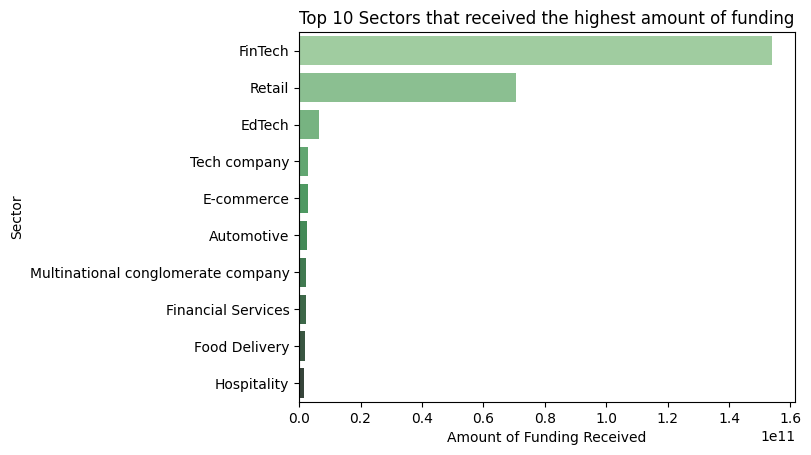

In [119]:
plt.title('Top 10 Sectors that received the highest amount of funding')
sns.barplot(y=top_10_industry['Sector'],x=top_10_industry['Amount($)'],palette='Greens_d')
plt.xlabel('Amount of Funding Received')
plt.ylabel('Sector')
plt.show()

### Which industry received the lowest amount of funding?

In [120]:
## using .tail() to get industries with least funding
lowest =industry.tail(100)
lowest

,Sector,Amount($)
81,Beauty & wellness,150000.00
580,Wealth Management,150000.00
372,Job discovery platform,140000.00
439,Nutrition tech,133000.00
86,Bike Rental,125000.00
...,...,...
500,Smart Cities,0.00
154,Content commerce,0.00
498,Skincare startup,0.00
425,Music Streaming,0.00


In [121]:
#get sectors with amounts greater than 0
lowest_funding=lowest[lowest['Amount($)']>0.0]
lowest_funding

,Sector,Amount($)
81,Beauty & wellness,150000.00
580,Wealth Management,150000.00
372,Job discovery platform,140000.00
439,Nutrition tech,133000.00
86,Bike Rental,125000.00
575,Virtual auditing startup,120000.00
187,Dating app,110000.00
302,Government,100000.00
377,Legal tech,100000.00
167,Credit Cards,100000.00


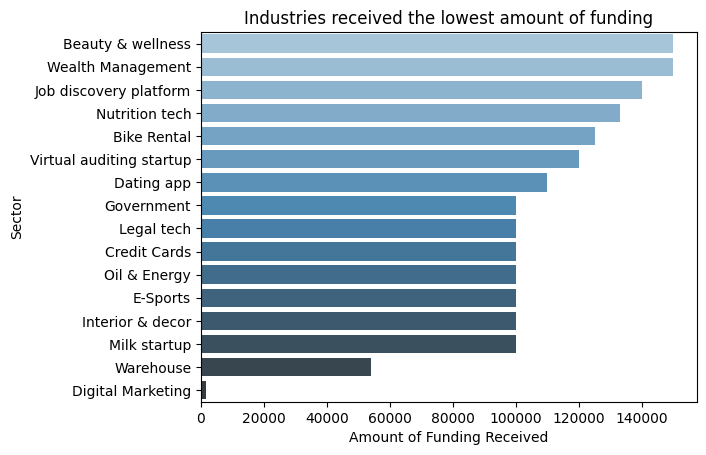

In [122]:
#plot
plt.title('Industries received the lowest amount of funding')
#plt.barh(top_10_idsty.index,top_10_idsty['Amount($)'], color='blue')
sns.barplot(y=lowest_funding['Sector'''],x=lowest_funding['Amount($)'],palette='Blues_d')
plt.xlabel('Amount of Funding Received')
plt.ylabel('Sector')
plt.show()

These Sectors did not receive enough funding from investors in the Indian Ecosystem.

### Which location recorded the highest amount of funding received?

In [123]:
HQ=startup_data.groupby('HeadQuarter').sum(numeric_only=True).reset_index()

In [124]:
#sort amount in descending order
HQ.sort_values(['Amount($)'], ascending = False, inplace=True)
HQ

,HeadQuarter,Amount($)
74,Mumbai,231530895700.00
9,Bangalore,24515424404.00
41,Gurugram,5704667000.00
78,New Delhi,3423246040.00
21,California,3078300000.00
...,...,...
73,"Mountain View, CA",0.00
72,Mohali,0.00
69,Mangalore,0.00
52,Jharkhand,0.00


In [125]:
top_5_HQ=HQ.head()
top_5_HQ

,HeadQuarter,Amount($)
74,Mumbai,231530895700.00
9,Bangalore,24515424404.00
41,Gurugram,5704667000.00
78,New Delhi,3423246040.00
21,California,3078300000.00


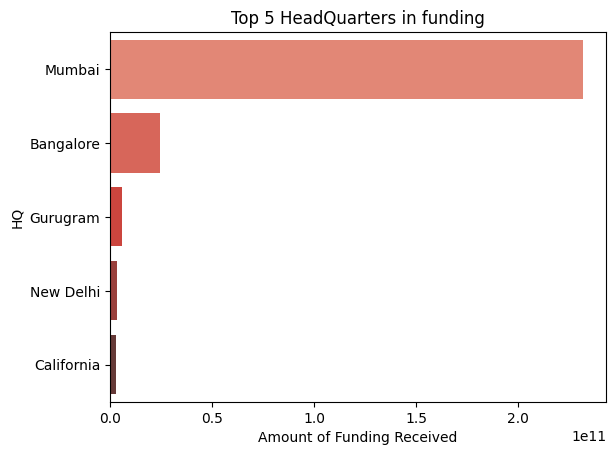

In [126]:
plt.title('Top 5 HeadQuarters in funding')
sns.barplot(y=top_5_HQ['HeadQuarter'],x=top_5_HQ['Amount($)'],palette='Reds_d')
plt.ylabel('HQ')
plt.xlabel('Amount of Funding Received')
plt.show()

###  What is the average amount of funding received in top ten sectors?

In [127]:
# avreage o
AVG_industry=startup_data.query("Sector==['FinTech','Retail','EdTech','Tech company','E-commerce','Automotive','Multinational conglomerate company','Food Delivery''Hospitality']").groupby(
    'Sector').mean(numeric_only=True).reset_index()

In [128]:
AVG_industry.sort_values(['Amount($)'], ascending = False, inplace=True)

In [129]:
AVG_industry

,Sector,Amount($)
5,Retail,2939265833.33
4,Multinational conglomerate company,2200000000.00
3,FinTech,999113701.30
6,Tech company,377837500.00
0,Automotive,52182363.52
1,E-commerce,42970925.37
2,EdTech,35456273.50


In [130]:
top_AV_SEC=AVG_industry

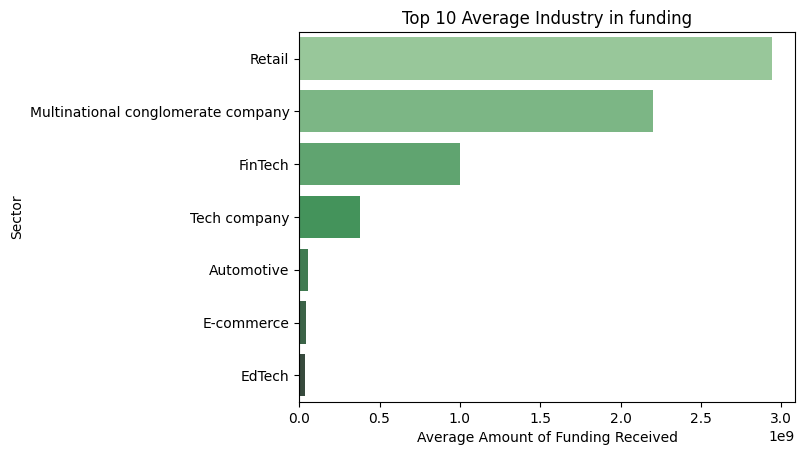

In [131]:
plt.title('Top 10 Average Industry in funding')
sns.barplot(y=top_AV_SEC['Sector'],x=top_AV_SEC['Amount($)'],palette='Greens_d')
plt.xlabel('Average Amount of Funding Received')
plt.ylabel('Sector')
plt.show()

### How many companies received funding in each year?

In [132]:
year =startup_data.groupby(['Funding Year']).count().reset_index()
year

,Funding Year,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,2018,526,526,526,378,526,526,526,526,526
1,2019,89,89,89,77,89,89,89,89,89
2,2020,1055,1055,1055,807,1055,1055,1055,1055,1055
3,2021,1206,1206,1206,1066,1206,1206,1206,1206,1206


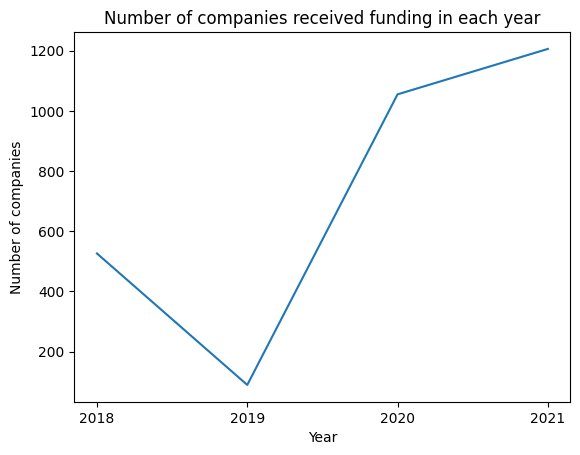

In [133]:
#plt.xlabel('Year')
#plt.ylabel('Number of companies r')
plt.title('Number of companies received funding in each year')
ax=sns.lineplot(y=year['Company/Brand'],x=year['Funding Year'])
ax.set(xlabel='Year',ylabel='Number of companies')
plt.show()

The year 2021 saw the highest number of companies receiving funding, with 1,206 companies, followed by 2020 with 1,055 companies, and 2018 with 526 companies. In contrast, the year 2019 had the lowest number of companies receiving funding, with only 89 companies.

### What is the total amount received funding each year

In [134]:
amtby_year=startup_data.groupby(['Funding Year']).sum(numeric_only=True).reset_index()
amtby_year

,Funding Year,Amount($)
0,2018,6641773177.00
1,2019,3336433200.00
2,2020,91516935104.00
3,2021,179850751000.00


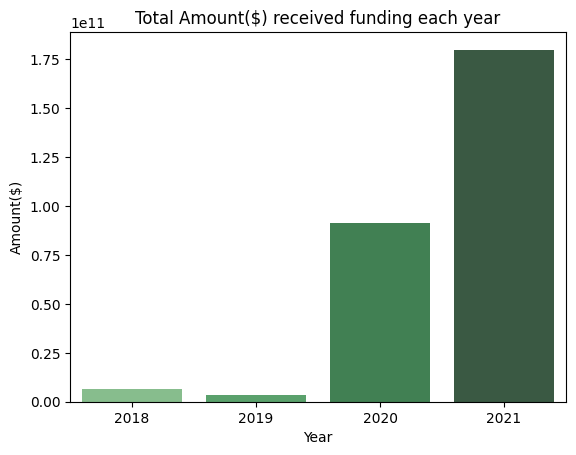

In [135]:
plt.title('Total Amount($) received funding each year')
ax=sns.barplot(y=amtby_year['Amount($)'],x=amtby_year['Funding Year'],palette='Greens_d')
ax.set(xlabel='Year',ylabel='Amount($)')
plt.show()

### Which company received the highest amount of funds?

In [136]:
companies=startup_data.groupby('Company/Brand').sum(numeric_only=True).reset_index()
companies

,Company/Brand,Amount($)
0,&ME,0.00
1,1Bridge,2500000.00
2,1Crowd,3500000.00
3,1K Kirana Bazaar,7000000.00
4,1MG,9900000.00
...,...,...
2209,saarthi.ai,0.00
2210,srJna,0.00
2211,truMe,140000.00
2212,uFony Services Pvt ltd,0.00


In [137]:
companies.sort_values(['Amount($)'], ascending = False, inplace=True)

In [138]:
companies

,Company/Brand,Amount($)
70,Alteria Capital,150000000000.00
1556,Reliance Retail Ventures Ltd,70000000000.00
1726,Snowflake,3000000000.00
1553,Reliance,2200000000.00
1818,Swiggy,1956000000.00
...,...,...
1352,Orbo.ai,0.00
1365,PadCare Labs,0.00
1368,PakkaProfile,0.00
1379,Pathfndr.io,0.00


In [139]:
top_5_companies=companies.head()

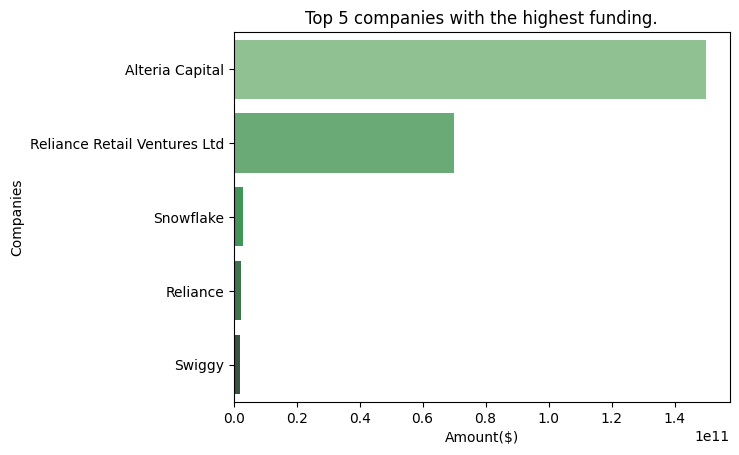

In [140]:
##plt.title('Total Amount($) received funding each year')
ax=sns.barplot(y=top_5_companies['Company/Brand'],x=top_5_companies['Amount($)'],palette='Greens_d')
ax.set(xlabel='Amount($)',ylabel='Companies')
plt.title('Top 5 companies with the highest funding.')
plt.show()

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

### What id the trend of funding received by top 5 Sectors from 2018 to 2021

In [141]:
HQ_sec=startup_data.query("Sector==['EdTech','FinTech','Retail', 'Tech company','E-commerce']").groupby([
    'Funding Year','Sector'])['Amount($)'].sum(numeric_only=True).reset_index()
#HQ_sec.sort_values(['Funding Year'], ascending = True, inplace=True)
HQ_sec

,Funding Year,Sector,Amount($)
0,2018,EdTech,591914500.00
1,2018,FinTech,17600000.00
2,2018,Retail,37680000.00
3,2019,E-commerce,288000000.00
4,2019,EdTech,736182700.00
5,2020,E-commerce,1261607000.00
6,2020,EdTech,3112502030.00
7,2020,FinTech,1233930000.00
8,2020,Retail,70239400000.00
9,2020,Tech company,3022700000.00


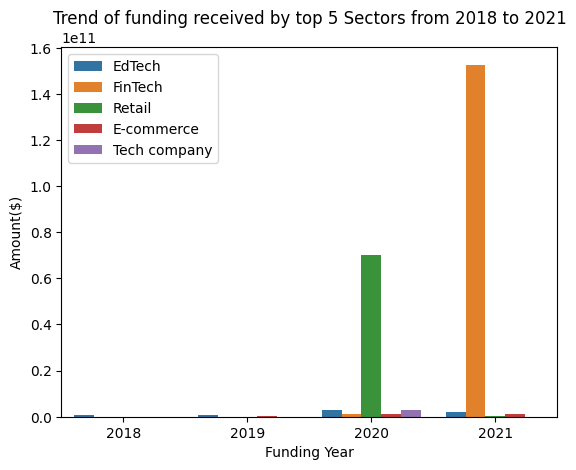

In [142]:
sns.barplot(x=HQ_sec['Funding Year'],y=HQ_sec['Amount($)'],hue=HQ_sec['Sector'])
plt.title('Trend of funding received by top 5 Sectors from 2018 to 2021')
plt.legend(loc='upper left')

### What is the trend of funding reveived by top 5 HeadQuarters from 2018 to 2021

In [143]:

top_5_HQ_visual=startup_data.query("HeadQuarter==['Mumbai','Bangalore','Gurugram', 'New Delhi','California']").groupby([
    'HeadQuarter','Funding Year']).sum(numeric_only=True).reset_index()
top_5_HQ_visual.sort_values(['Funding Year'], ascending = True, inplace=True)
top_5_HQ_visual

,HeadQuarter,Funding Year,Amount($)
0,Bangalore,2018,2304840046.00
8,Mumbai,2018,1842373200.00
12,New Delhi,2018,464194040.00
1,Bangalore,2019,824900000.00
5,Gurugram,2019,785200000.00
9,Mumbai,2019,372500000.00
13,New Delhi,2019,5000000.00
2,Bangalore,2020,5644849358.00
4,California,2020,3078300000.00
6,Gurugram,2020,580582000.00


Text(0.5, 1.0, 'Trend of funding received by top 5 HeadQuarter from 2018 to 2021')

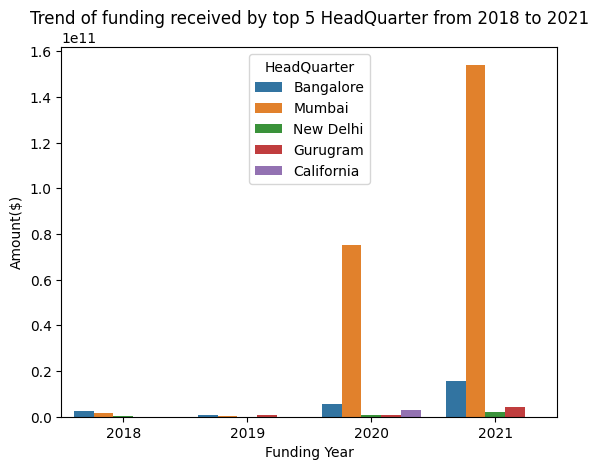

In [144]:
sns.barplot(x=top_5_HQ_visual['Funding Year'],y=top_5_HQ_visual['Amount($)'],hue=top_5_HQ_visual['HeadQuarter'])
plt.title('Trend of funding received by top 5 HeadQuarter from 2018 to 2021')


### Conclusion


After the analysis, it was observed that in the Indian Ecosystem ,the top industry in terms of funding is FinTech, with $153.86 billion, followed by Retail with $70.54 billion, and EdTech with $6.38 billion. Other industries in the list include Tech Company, E-commerce, Automotive, Multinational Conglomerate Company, Financial Services, Food Delivery, and Hospitality, all of which received varying amounts of funding.

In terms of locations, Mumbai is the top location with the highest funding amount of $231.53 billion, followed by Bangalore with $24.52 billion. Other locations include Gurugram, New Delhi, and California, all of which received varying amounts of funding.

We reject rhe **Null Hypothesis** and accept the Alternate Hypothesis that funding to startup is spread across different locations and sectors.

**Recommendations**

We advise our team to venture into these top Industries: **FinTech, Retail, EdTech, Tech Company and E-cmmerce** in the top Locations:**Mumbai, Bangalore, and Gurugram** in the Indian Ecosystem